In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('dermatology_database_1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [5]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [7]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
print(data.isnull().sum())

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
x=data.drop('class',axis=1)
y=data['class']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train = x_train.replace('?', np.nan)
x_test = x_test.replace('?', np.nan)
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train[col] = x_train[col].fillna(x_train[col].mode()[0])
        x_test[col] = x_test[col].fillna(x_train[col].mode()[0])
    else:
        x_train[col] = x_train[col].fillna(x_train[col].mean())
        x_test[col] = x_test[col].fillna(x_train[col].mean())
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7297297297297297


In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9864864864864865


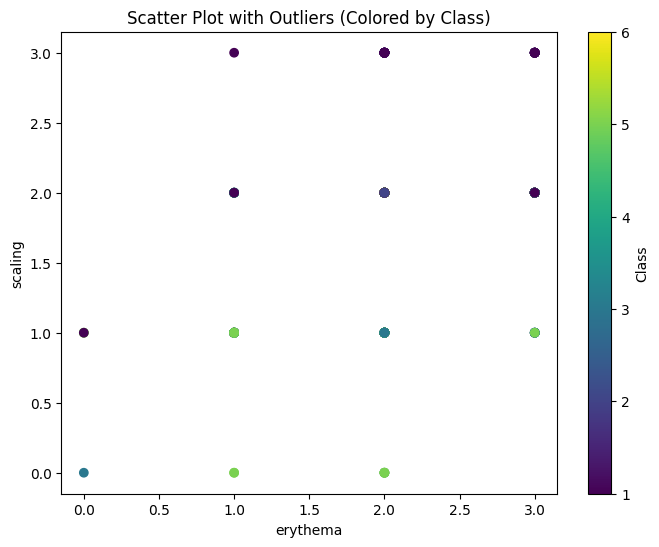

In [23]:

import matplotlib.pyplot as plt
feature1 = 'erythema'
feature2 = 'scaling'

plt.figure(figsize=(8, 6))
plt.scatter(x[feature1], x[feature2], c=y, cmap='viridis') # Color points by class
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot with Outliers (Colored by Class)')
plt.colorbar(label='Class')
plt.show()

In [26]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [27]:
x_filtered = remove_outliers_iqr(x, 'erythema')
x_filtered = remove_outliers_iqr(x_filtered, 'scaling')

In [28]:
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(x_filtered, y.loc[x_filtered.index], test_size=0.2, random_state=42)

In [29]:
x_train_filtered = x_train_filtered.replace('?', np.nan)
x_test_filtered = x_test_filtered.replace('?', np.nan)

In [30]:
for col in x_train_filtered.columns:
    if x_train_filtered[col].dtype == 'object':
        x_train_filtered[col] = x_train_filtered[col].fillna(x_train_filtered[col].mode()[0])
        x_test_filtered[col] = x_test_filtered[col].fillna(x_train_filtered[col].mode()[0])
    else:
        x_train_filtered[col] = x_train_filtered[col].fillna(x_train_filtered[col].mean())
        x_test_filtered[col] = x_test_filtered[col].fillna(x_train_filtered[col].mean())

In [31]:
svm_model_filtered = SVC()
svm_model_filtered.fit(x_train_filtered, y_train_filtered)
svm_predictions_filtered = svm_model_filtered.predict(x_test_filtered)
svm_accuracy_filtered = accuracy_score(y_test_filtered, svm_predictions_filtered)
print("SVM Accuracy (after outlier removal):", svm_accuracy_filtered)

SVM Accuracy (after outlier removal): 0.813953488372093


In [32]:
rf_model_filtered = RandomForestClassifier()
rf_model_filtered.fit(x_train_filtered, y_train_filtered)
rf_predictions_filtered = rf_model_filtered.predict(x_test_filtered)
rf_accuracy_filtered = accuracy_score(y_test_filtered, rf_predictions_filtered)
print("Random Forest Accuracy (after outlier removal):", rf_accuracy_filtered)

Random Forest Accuracy (after outlier removal): 0.9534883720930233


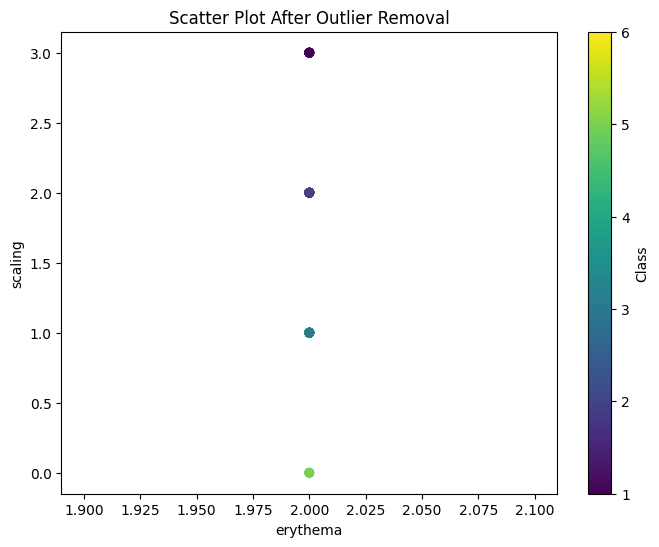

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered[feature1], x_filtered[feature2], c=y.loc[x_filtered.index], cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot After Outlier Removal')
plt.colorbar(label='Class')
plt.show()

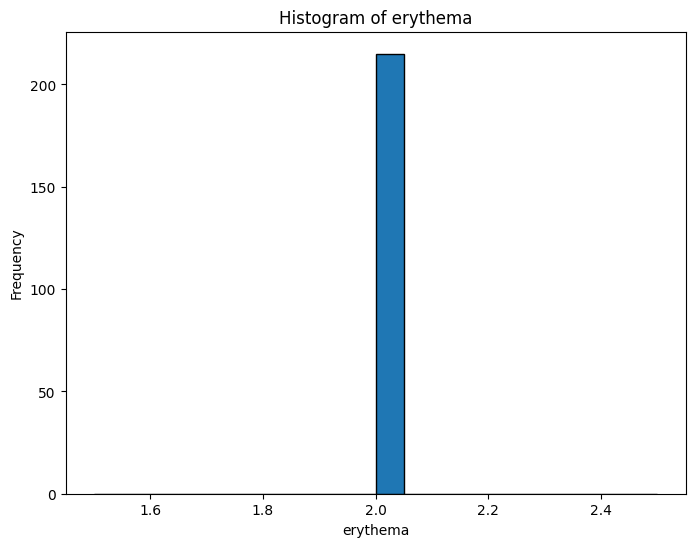

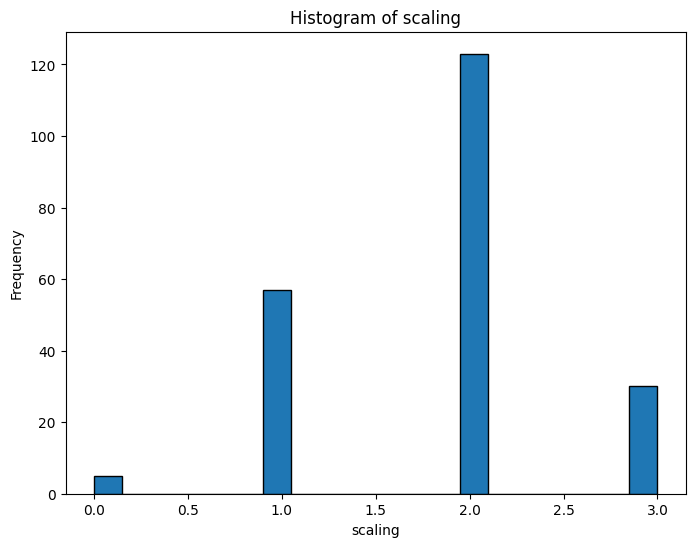

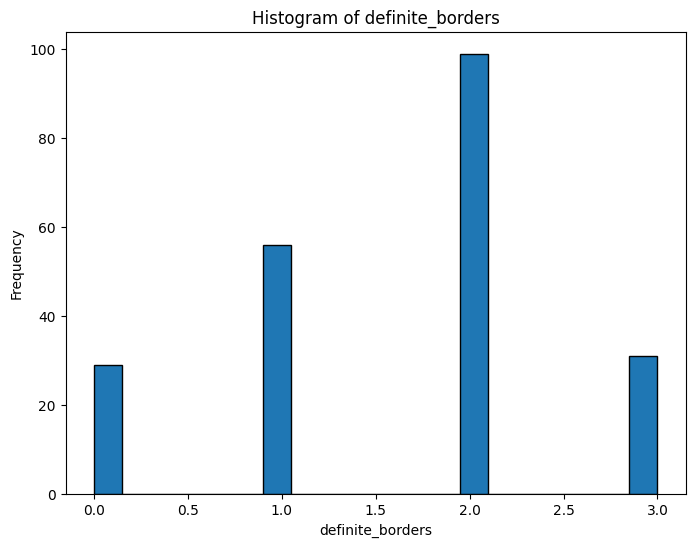

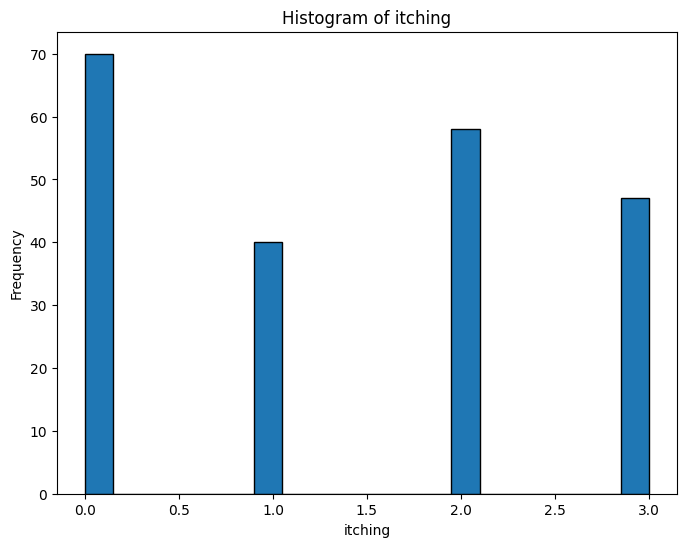

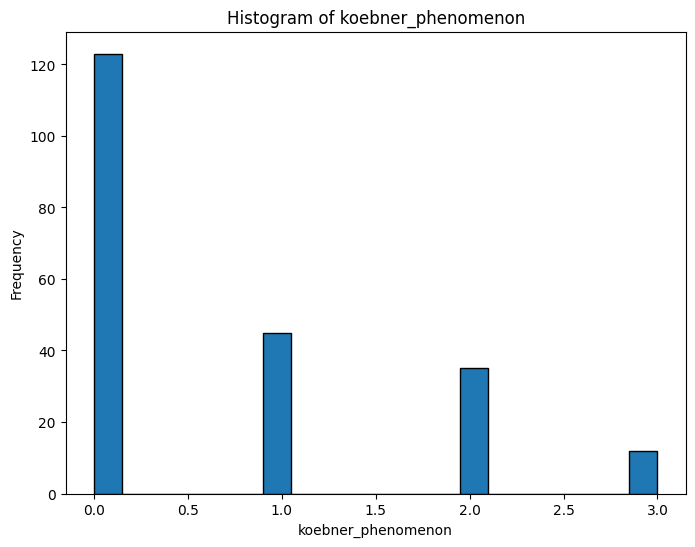

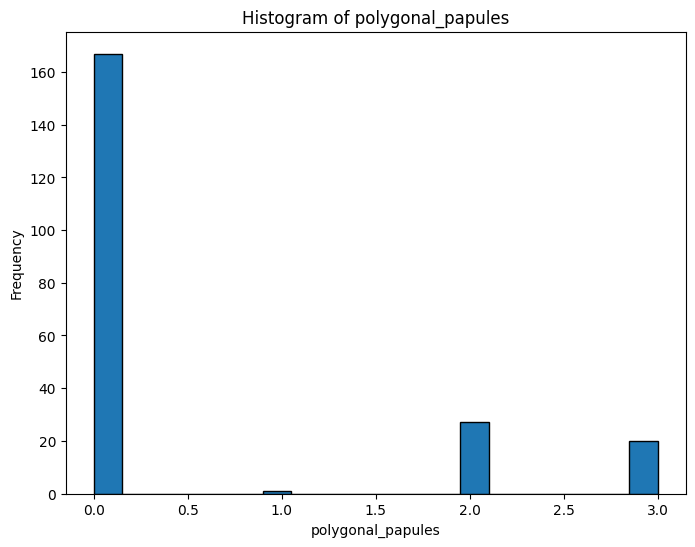

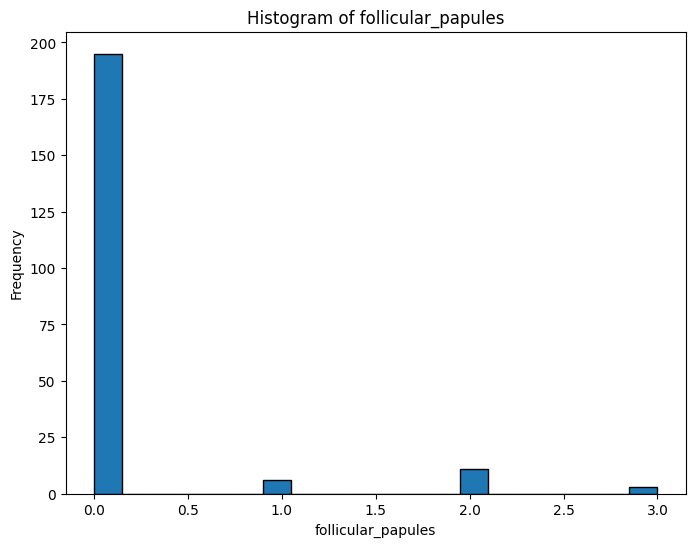

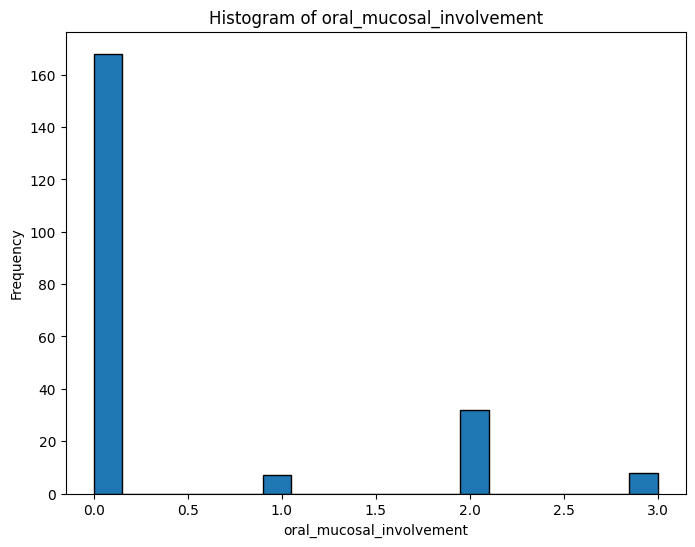

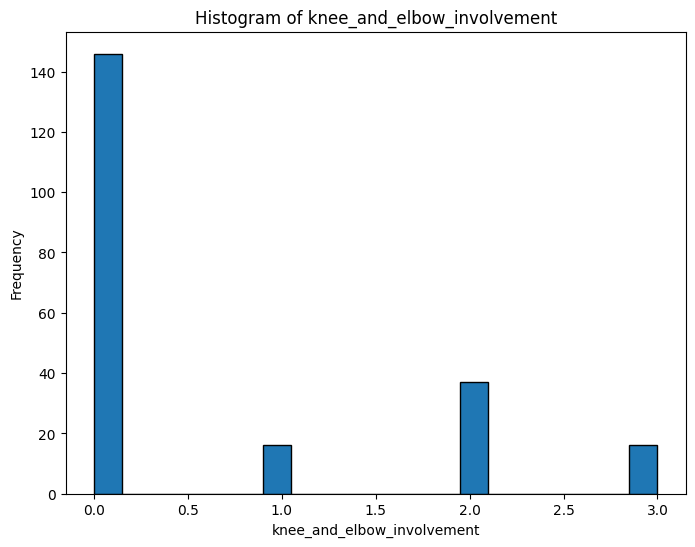

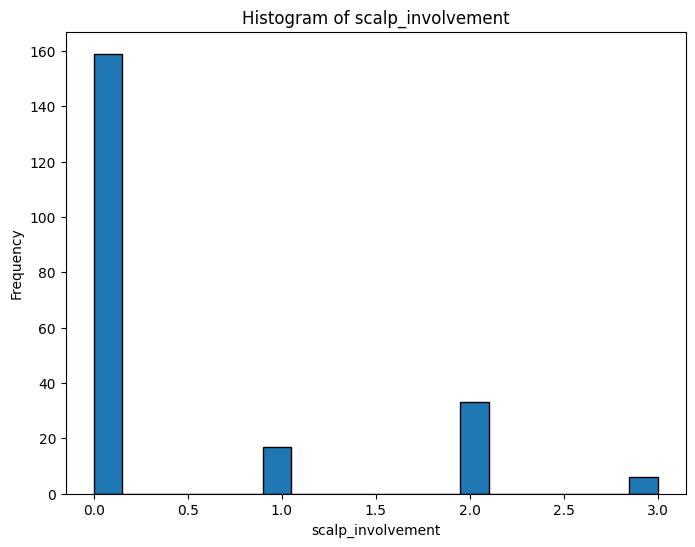

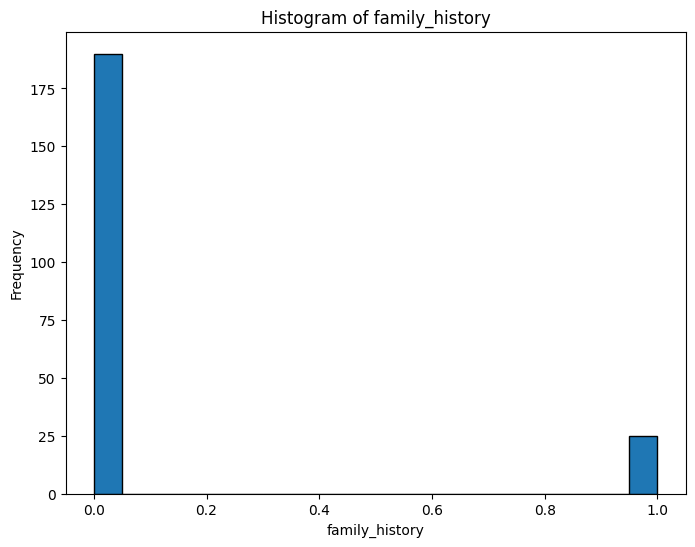

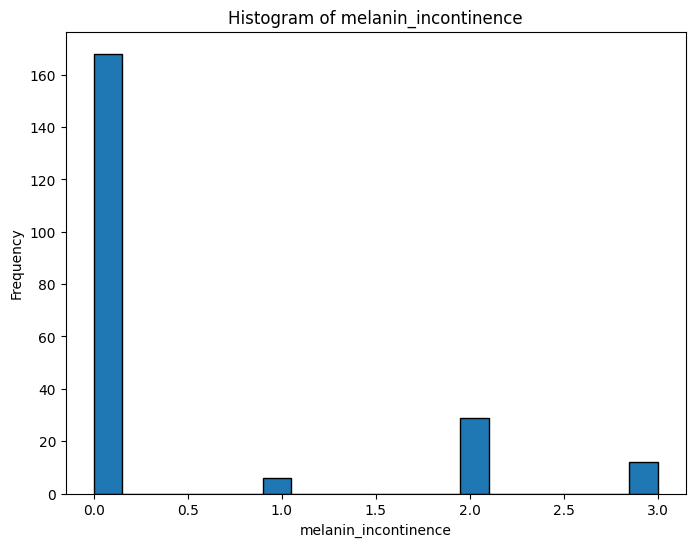

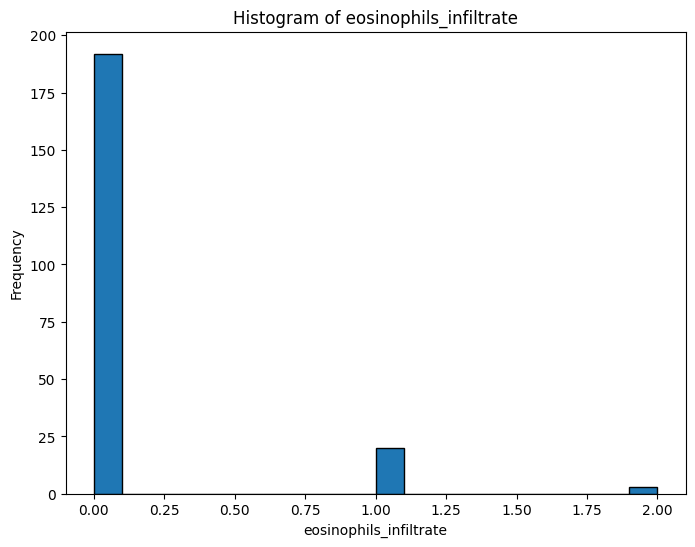

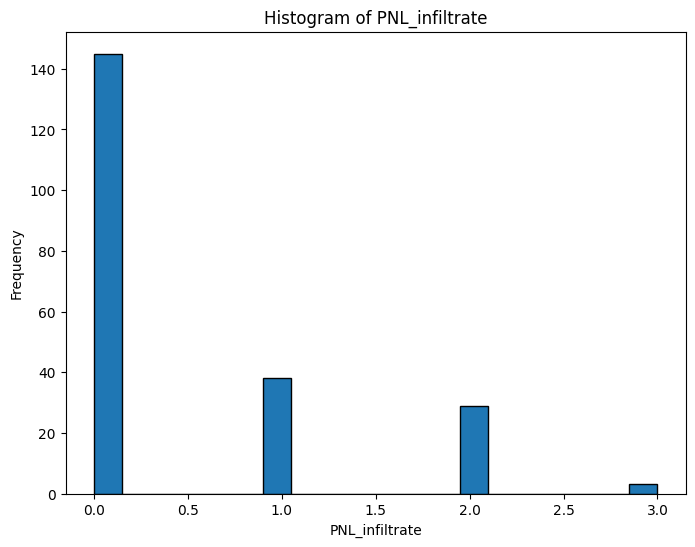

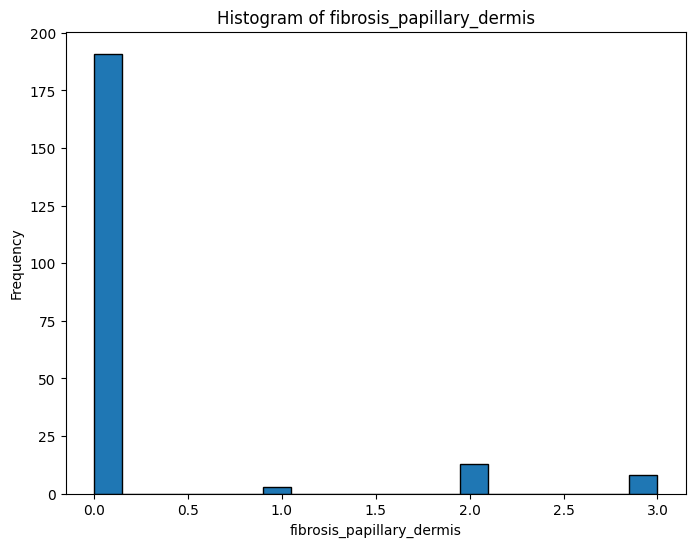

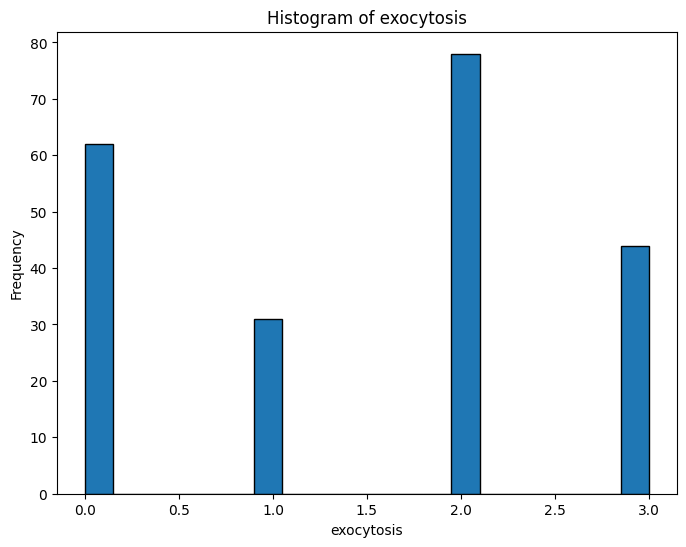

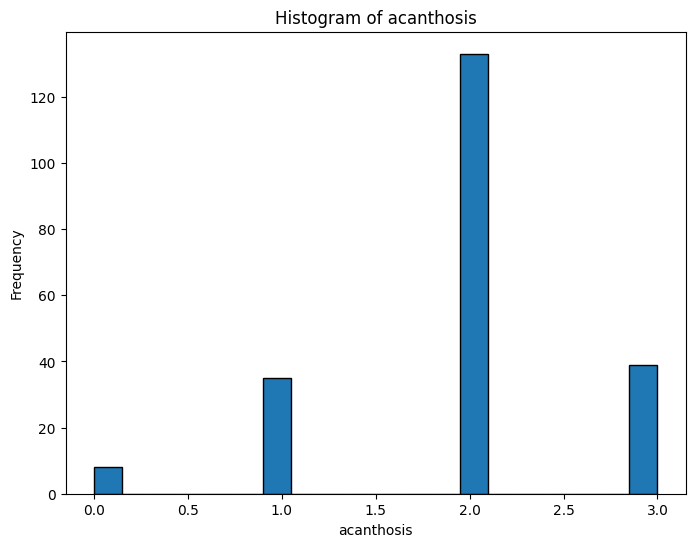

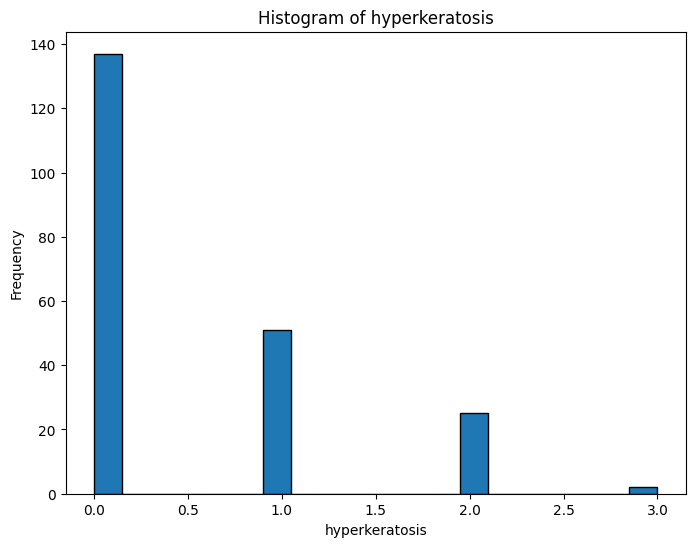

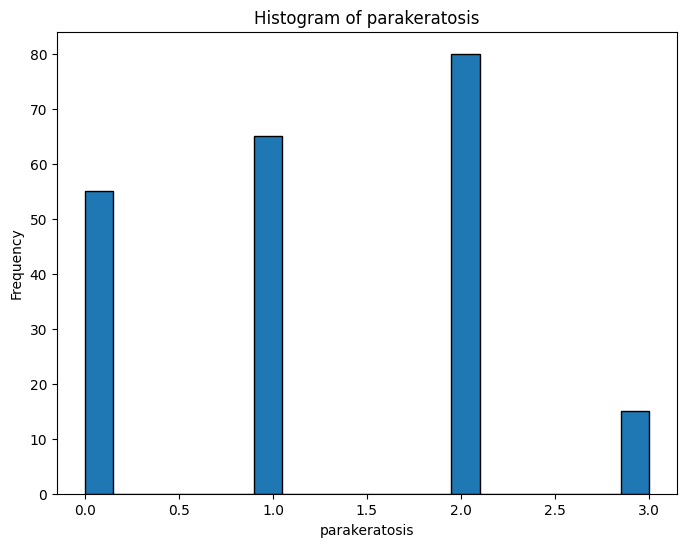

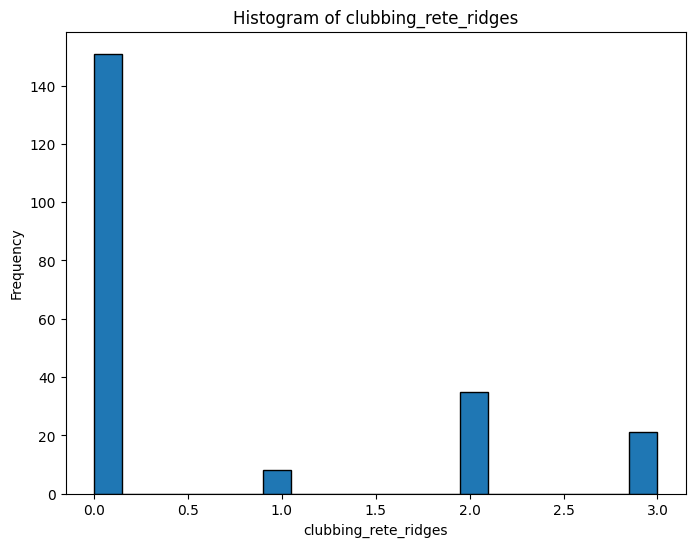

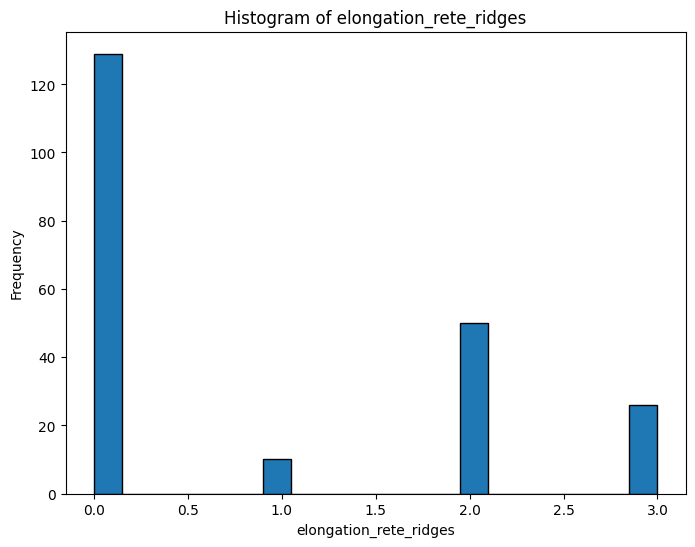

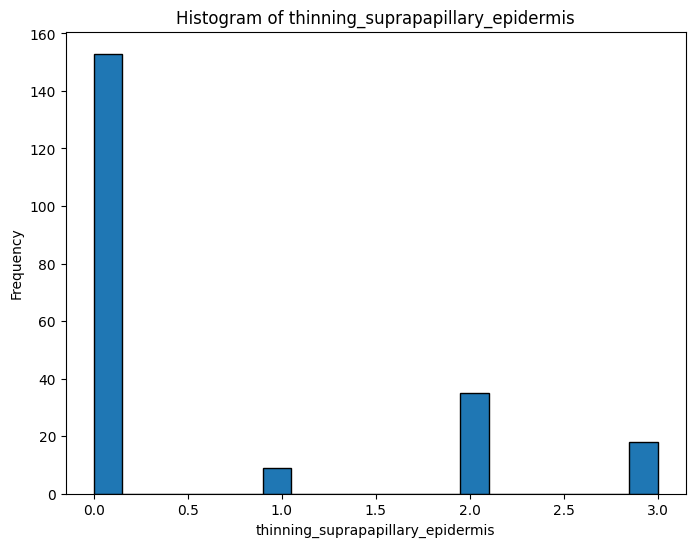

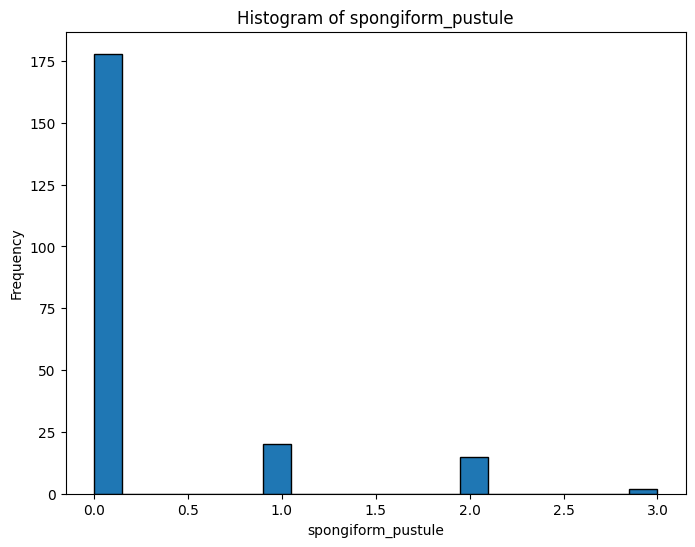

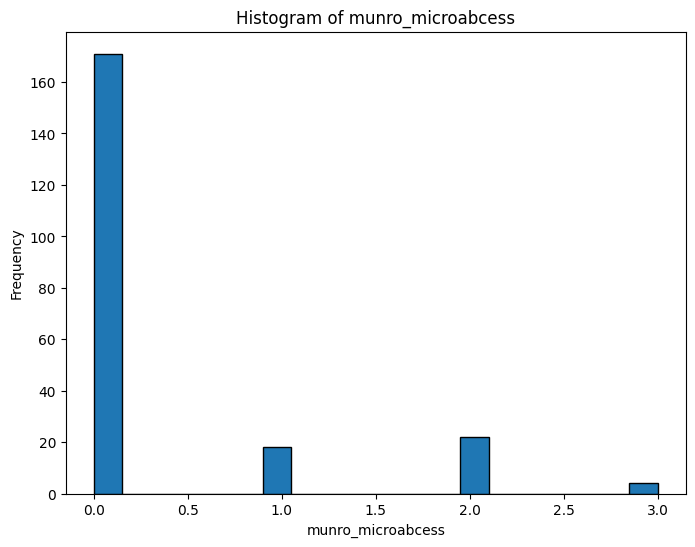

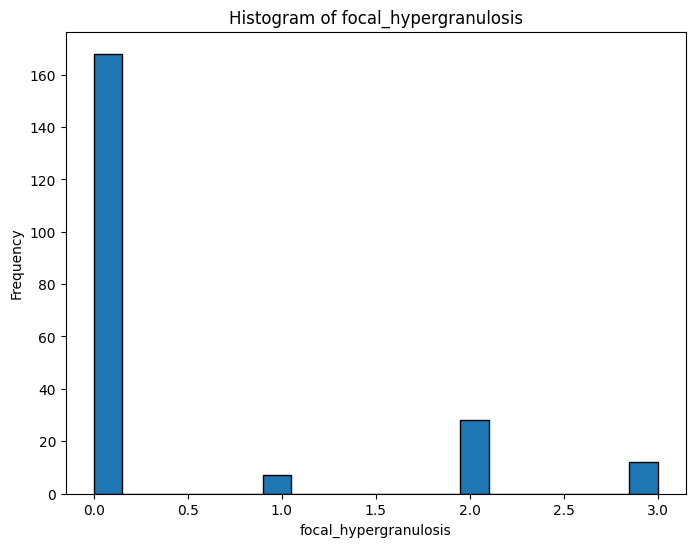

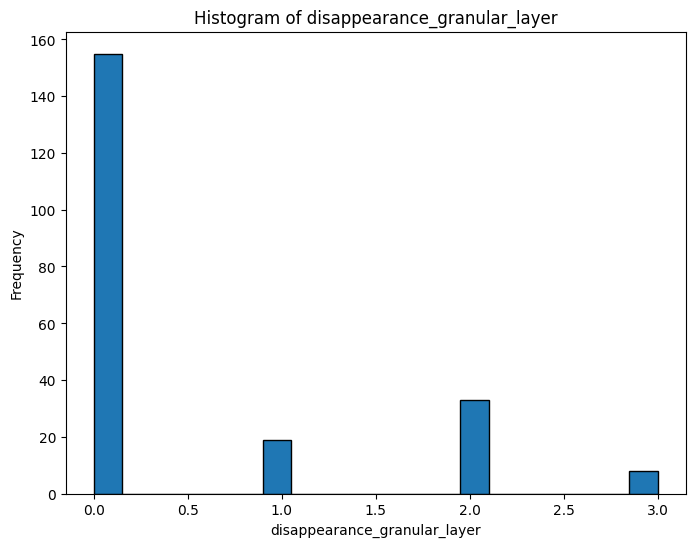

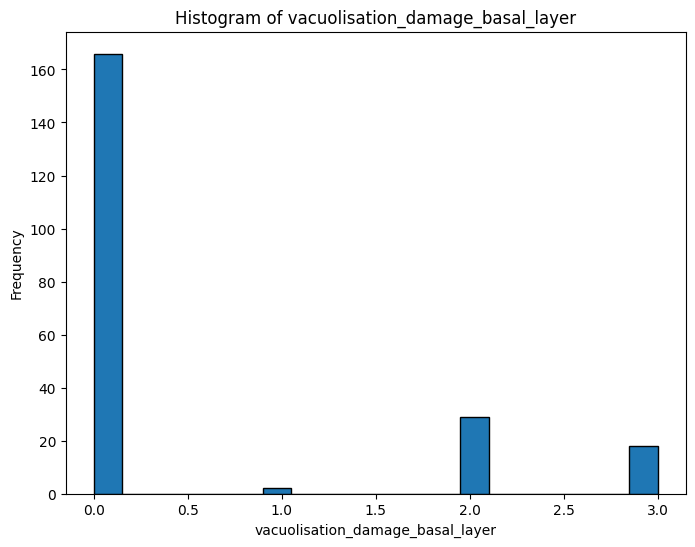

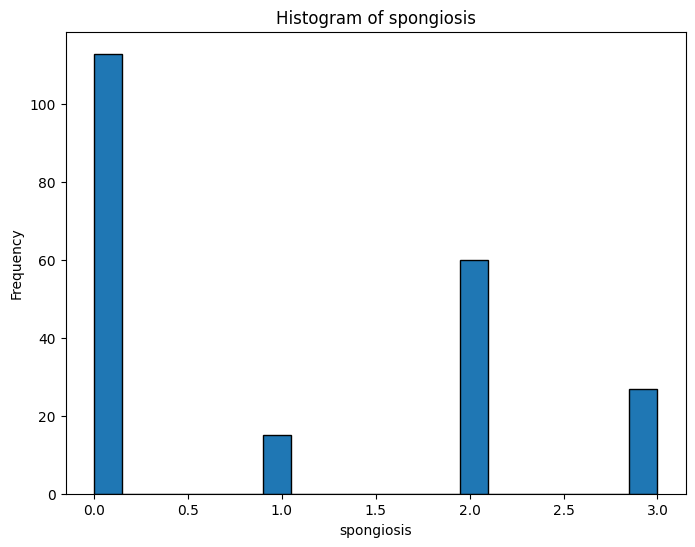

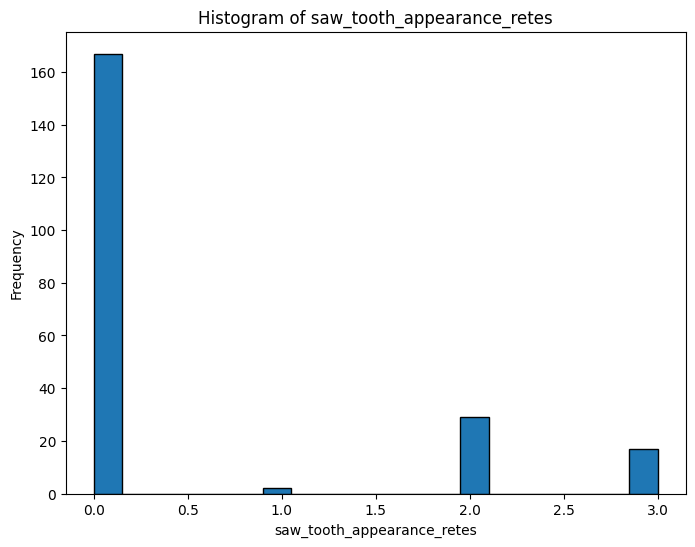

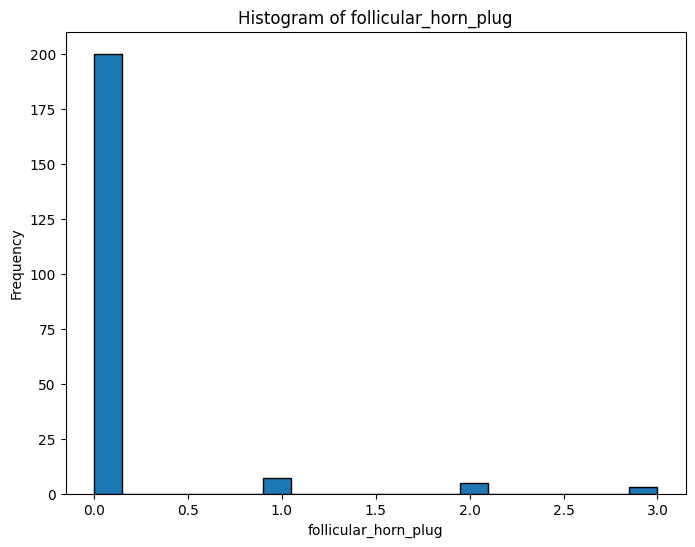

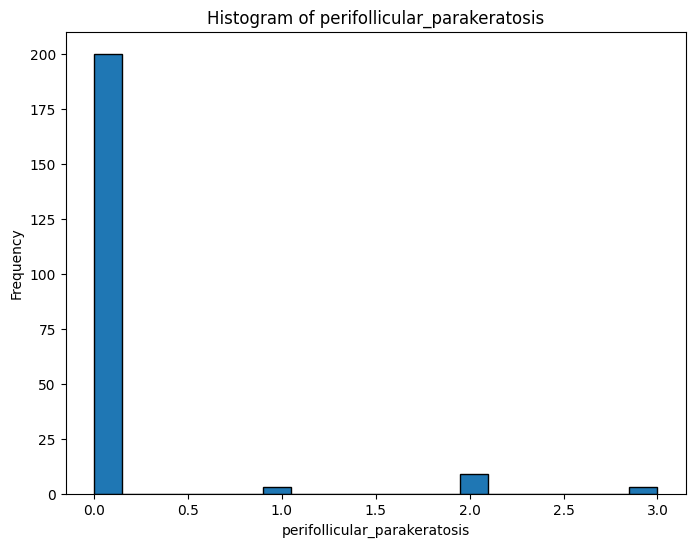

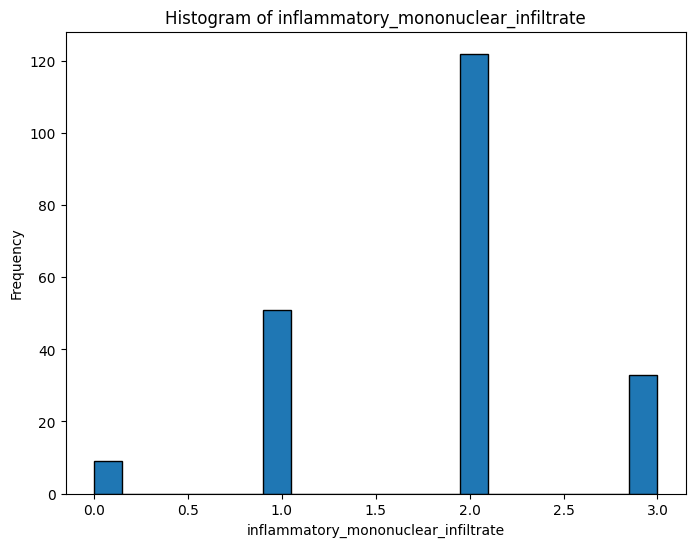

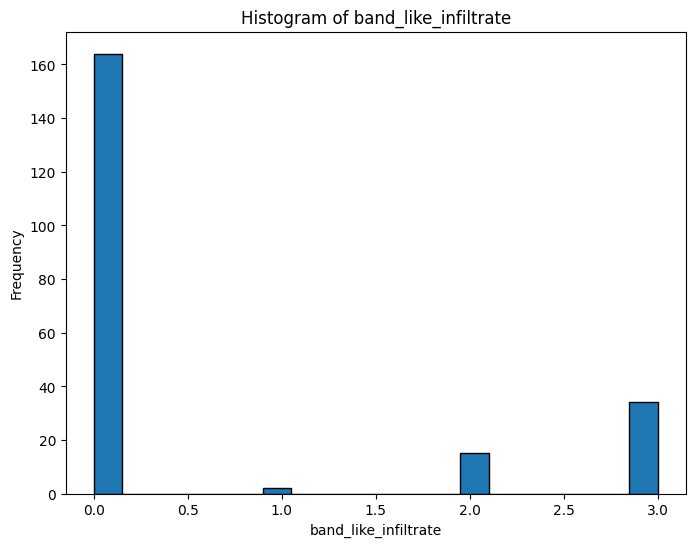

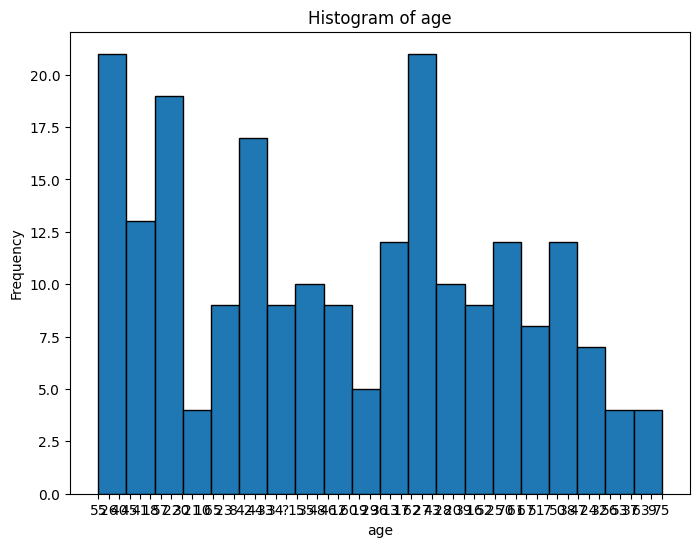

In [34]:
import matplotlib.pyplot as plt
for col in x_filtered.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(x_filtered[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()